 Pre-entrega 3 - Machine Learning aplicado a la deforestación en Argentina

Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Cargo el dataset

In [29]:
df = pd.read_csv("Argentina_Deforestacion.csv")

Exploracion basica del dataset

In [31]:
print("Primeras filas del dataset:")
(df.head())

Primeras filas del dataset:


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,deforestation_hectares
0,2001,ARGENTINA,AR,12 DE OCTUBRE,AR-22036,CHACO,AR-22,2281.401340
1,2001,ARGENTINA,AR,1º DE MAYO,AR-22126,CHACO,AR-22,199.175695
2,2001,ARGENTINA,AR,25 DE MAYO,AR-22168,CHACO,AR-22,315.433401
3,2001,ARGENTINA,AR,2 DE ABRIL,AR-22039,CHACO,AR-22,293.300178
4,2001,ARGENTINA,AR,9 DE JULIO,AR-22105,CHACO,AR-22,671.230102


In [32]:
print("Cantidad de datos:")
(df.shape)

Cantidad de datos:


(2380, 8)

In [33]:
print("Valores nulos:")
(df.isnull().sum())

Valores nulos:


,0
year,0
country,0
country_iso2,0
region,0
region_trase_id,0
parent_region,0
parent_region_trase_id,0
deforestation_hectares,0


Los datos no presentan valores nulos, por lo tanto no es necesario hacer limpieza. Ademas contiene 2381 filas y 8 columnas, lo que brinda una buena cantidad de informacion para entrenar el modelo

**Analisis visual:**

Grafico boxplot para ver que años tuvieron mas deforestacion,si hay valores extremos(muy altos o muy bajos)  y  si hay alguna tendencia

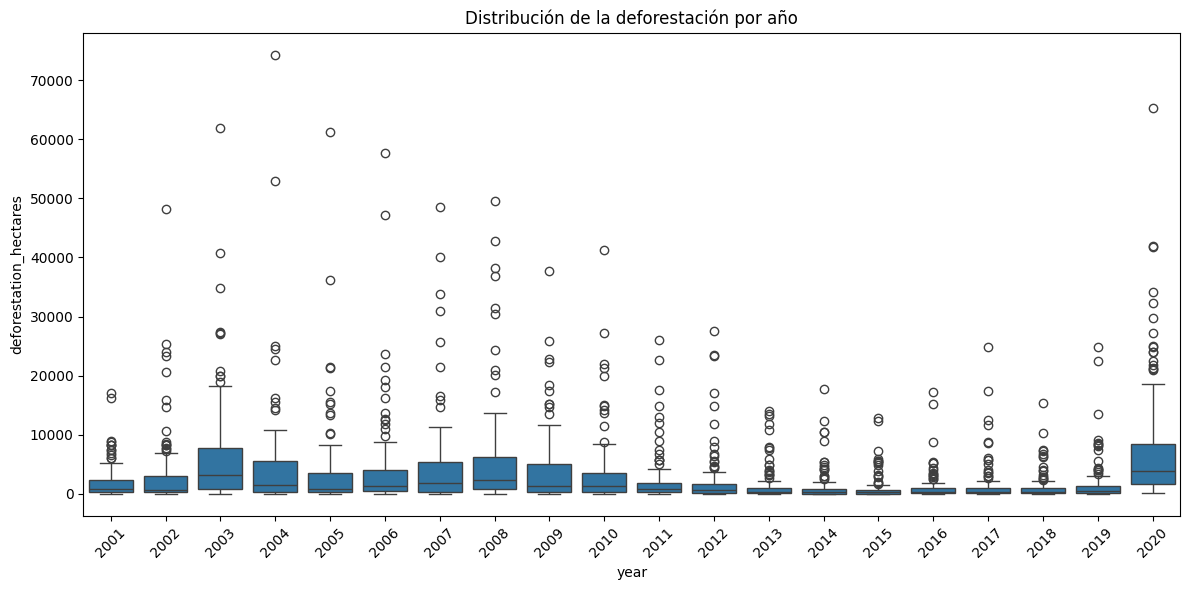

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="year", y="deforestation_hectares")
plt.title("Distribución de la deforestación por año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el grafico podemos observar como entre el año 2008 y 2012 la deforestacion en Arrgentina alcanzo valores significativamente mas altos, con registros que superan las 60.000 hectareas.
Ademas a partir del año 2015 se percibe una disminucion considerable en los valores de deforestacion. Sin embargo, hay algunos valores extremos en el ultimo año 2020.

**Codificacion de variables categoricas**

Transformamos las variables "parent_region" y "region" que originalmente eran de tipo texto, a valores numericos para que el modelo interprete mejor la informacion

In [35]:
le_prov = LabelEncoder()
df["parent_region"] = le_prov.fit_transform(df["parent_region"])
df["region"] = le_prov.fit_transform(df["region"])

**Separacion en variables independientes y dependientes**

x: son los factores que usamos para predecir

y: es lo que queremos predecir

In [14]:
X = df[["year", "parent_region", "region"]]
y = df["deforestation_hectares"]

**Division del dataset para el entrenamiento y la prueba**

Separamos el dataset en 2 partes, 80% para entrenar el modelo y 20% para probar como funciona

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenamiento del modelo

modelo base - random forest

In [37]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluamos el modelo base

In [38]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [40]:
print("Métricas del modelo base:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


Métricas del modelo base:
MAE: 1724.35
MSE: 15666194.76
R^2: 0.67


Optimizacion con GridSearchCV

In [41]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}

In [42]:
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [43]:
print("\nMejores parámetros encontrados:")
(grid.best_params_)


Mejores parámetros encontrados:


{'max_depth': None, 'n_estimators': 150}

Evaluacion del modelo optimizado

In [44]:
y_pred_opt = grid.predict(X_test)
mae_opt = mean_absolute_error(y_test, y_pred_opt)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)

**Conclusion Final**

  La deforestacion en Argentina presenta picos importantes entre 2008 y 2012.

  El modelo de regresion basado en Random Forest es capaz de predecir la
deforestacion con buen nivel de precision.

  Seria mas util complementarlocon otros datsets de datos climaticos,
economicos o de uso del suelo para mejorar las predicciones.